<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head(10)

/var/folders/mp/s3t18scd1pvck503vkmczpjw0000gn/T/ipykernel_20458/2558017407.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0
5,Good,12,3059,2,4,61,1,1,1,1,0,0,0,0,1,0,0
6,Bad,30,5234,4,2,28,2,1,1,1,0,1,0,0,0,0,1
7,Bad,48,4308,3,4,24,1,1,1,1,1,0,0,0,1,0,0
8,Good,12,1567,1,1,22,1,1,0,1,0,1,0,0,1,0,0
9,Bad,24,1199,4,4,60,2,1,1,1,1,0,0,0,0,0,1


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [3]:
# Command:

credit_train.isnull().sum()

# One sentance summary: With a help from ChatGPT I discoverer that there is no single "countnas()" function in pandas. 
# Instead, I need to chain two methods: "isnull()" converts every single value in the dataset into a boolean, True if the 
# value is NA, false if not.E.g.
#
# 0.4 NA
# 0.5 0.5
# will becomr
# False True
# False False
#
# The result keeps the same features, and "sum()" method counts the number of True values in each column.
# Finally, chained:
# credit_train.isnull().sum()
#

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

<Axes: xlabel='Amount', ylabel='Count'>

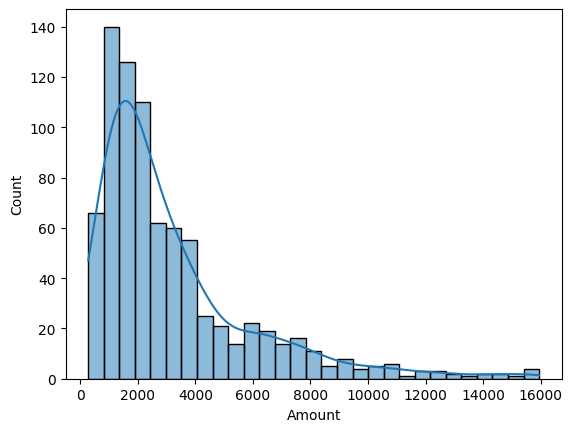

In [4]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.histplot(data=credit_train, x='Amount', kde=True)

# GitHub copilot wanted me to use different form of histplot. Remember that the first arg is DataFrame.

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

Probability of being good if critical: 0.83
Probability of being good if not critical: 0.64


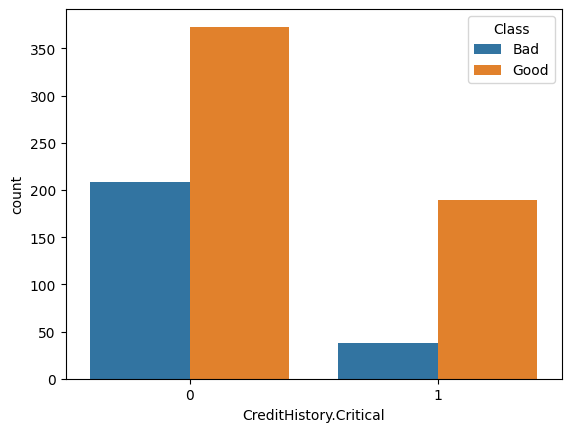

In [30]:
sn.countplot(data=credit_train, x="CreditHistory.Critical", hue="Class")

# One sentence summary:
# First I want to check what's in the CreditHistory.Critical column. I suspect it's boolean, but better be sure.
# credit_train['CreditHistory.Critical'] returns a Series, and "value_counts()" method counts the number of occurences of
# each unique value. Is boolean alright.
# Double checking the Class feature gives the same. Probably the bar plot is going to be the best way to visualize it.
#
# to the question: "P(Good | Critical), which is P(Good & Critical) / P(Critical).
p_good_and_critical = (
    credit_train.where(credit_train["Class"] == "Good")
    .where(credit_train["CreditHistory.Critical"] == True)
    .count()["Class"]
)
p_critical = credit_train.where(credit_train["CreditHistory.Critical"] == True).count()[
    "Class"
]

p_good_if_critical = p_good_and_critical / p_critical
print(f"Probability of being good if critical: {p_good_if_critical:.2f}")

# let's compare it with P(Good | Not Critical), which is P(Good & Not Critical) / P(Not Critical).
p_good_and_not_critical = (
    credit_train.where(credit_train["Class"] == "Good")
    .where(credit_train["CreditHistory.Critical"] == False)
    .count()["Class"]
)
p_not_critical = credit_train.where(
    credit_train["CreditHistory.Critical"] == False
).count()["Class"]
p_good_if_not_critical = p_good_and_not_critical / p_not_critical
print(f"Probability of being good if not critical: {p_good_if_not_critical:.2f}")

# One sentence summary:
# It is more likely to be good if the credit history is critical.

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [76]:
# Adding new feature
credit_train['Class.Binary'] = (credit_train['Class'] == 'Good').astype(int)
credit_train[['Class.Binary', 'Class']]

credit_test['Class.Binary'] = (credit_test['Class'] == 'Good').astype(int)
credit_test[['Class.Binary', 'Class']]


,Class.Binary,Class
0,1,Good
1,0,Bad
2,1,Good
3,0,Bad
4,0,Bad
...,...,...
187,0,Bad
188,1,Good
189,1,Good
190,1,Good


<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [67]:
from sklearn.linear_model import LogisticRegression

# Create a model
model = LogisticRegression().fit(X=credit_train[['CreditHistory.Critical']], y=credit_train['Class.Binary'])

# Coefficients and Intercept, courtesty of ChatGTP
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [[0.98114476]]
Intercept: [0.59130489]


### Summary

The form of the model is the following:

$$
log(\frac{p}{1-p}) = 0.59130489 + 0.98114476x
$$,

or after rearranging,

$$

p = \frac{1}{1 + e^{0.59130489 + 0.98114476x}}

$$

The values can be interpreted as the log odds of being a good credit when the credit history is not critical is $\approx0.59$, and the critical credit history increases it by $\approx0.98$.

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = pd.DataFrame()
predictions["Class.Probabilities"] = model.predict_proba(credit_test[["CreditHistory.Critical"]])[:, 1]
predictions["Class.Predicted"] = model.predict(credit_test[["CreditHistory.Critical"]])
predictions["Class.Binary"] = credit_test["Class.Binary"]
predictions["CredHistory.Critical"] = credit_test["CreditHistory.Critical"]

display(predictions)


print(confusion_matrix(predictions["Class.Binary"], predictions["Class.Predicted"]))

,Class.Probabilities,Class.Predicted,Class.Binary,CredHistory.Critical
0,0.643664,1,1,0
1,0.643664,1,0,0
2,0.643664,1,1,0
3,0.643664,1,0,0
4,0.643664,1,0,0
...,...,...,...,...
187,0.828133,1,0,1
188,0.643664,1,1,0
189,0.643664,1,1,0
190,0.643664,1,1,0


[[  0  54]
 [  0 138]]


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [88]:
# Command that outputs acccuracy
print(classification_report(predictions['Class.Binary'], predictions['Class.Predicted']))
print(f"Accuracy: {model.score(credit_test[['CreditHistory.Critical']], credit_test['Class.Binary']):.2f}")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.72      1.00      0.84       138

    accuracy                           0.72       192
   macro avg       0.36      0.50      0.42       192
weighted avg       0.52      0.72      0.60       192

Accuracy: 0.72


/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

<h3>Q.7. Generate the ROC curve.</h3>

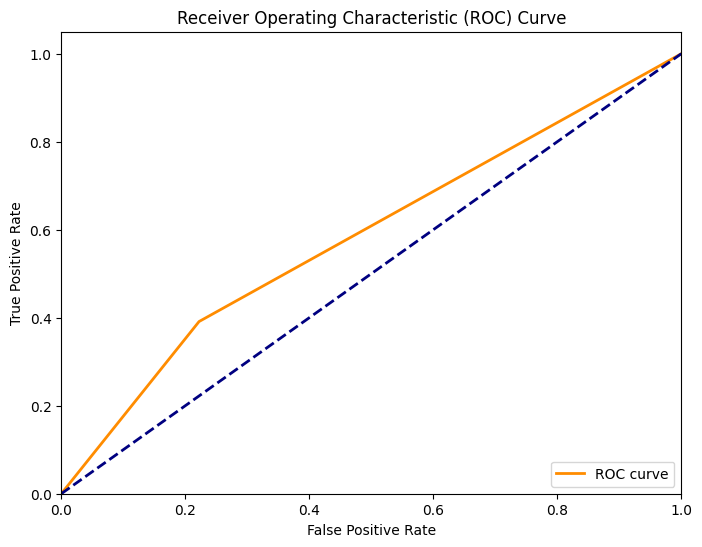

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(predictions[['Class.Binary']], predictions[['Class.Probabilities']])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [93]:
# Command(s):
auc = roc_auc_score(predictions[['Class.Binary']], predictions[['Class.Probabilities']])
print(f"AUC: {auc:.2f}")

AUC: 0.58


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(credit_train[['CreditHistory.Critical']], credit_train['Class.Binary'])

# Coefficients and Intercept, courtesty of ChatGTP
print(f"Coefficients: {lda.coef_}")
print(f"Intercept: {lda.intercept_}")

Coefficients: [[0.93008353]]
Intercept: [0.59794154]


<h3>Q.10. What is the accuracy of the new model?</h3>

In [95]:

print(lda.score(credit_test[['CreditHistory.Critical']], credit_test['Class.Binary']))

0.71875


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

After reading the intro to the exercise I was looking forward to getting some nice and meaningful results because of 
a relatively high quality of the data. Unfortunately, it turned looks like the suggested feature does not explain well
the credit worthiness. The accuracy of the model is only 0.7, and the ROC AUC is 0.5, which means that the model is not really much better than a random guess. It's especially disappointing that the model was not able to predict a single bad credit worthiness.

I think it would be useful to look at the conditinal probabilities to see which are the best predicttors of the credit worthiness.